In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

#### Importing the gold futures vs cpi data

In [65]:
gold_vs_cpi=pd.read_csv("gold_futures vs cpi.csv", index_col=0)
gold_vs_cpi.head()

,price,CPI value
date,,
28/02/1975,183.00,52.6
31/03/1975,179.02,52.8
30/04/1975,166.80,53.0
31/05/1975,168.50,53.1
30/06/1975,167.80,53.5


In [66]:
gold_vs_cpi.dtypes

price        float64
CPI value    float64
dtype: object

#### Converting the index into a datetime index

In [67]:
gold_vs_cpi.index=pd.to_datetime(gold_vs_cpi.index)

In [70]:
gold_vs_cpi.head()

,price,CPI value
date,,
1975-02-28,183.00,52.6
1975-03-31,179.02,52.8
1975-04-30,166.80,53.0
1975-05-31,168.50,53.1
1975-06-30,167.80,53.5


In [76]:
gold_vs_cpi.columns

Index(['price', 'CPI value'], dtype='object')

#### Changing column name

In [84]:
gold_vs_cpi.rename(columns={"CPI value":"CPI"}, inplace=True)

In [85]:
gold_vs_cpi.head()

,price,CPI
date,,
1975-02-28,183.00,52.6
1975-03-31,179.02,52.8
1975-04-30,166.80,53.0
1975-05-31,168.50,53.1
1975-06-30,167.80,53.5


#### Lets start the regression

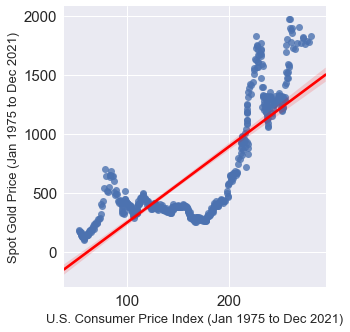

In [96]:
sns.lmplot(x="CPI", y="price", data=gold_vs_cpi, line_kws={"color":"r"})
plt.xlabel("U.S. Consumer Price Index (Jan 1975 to Dec 2021)", fontsize=13)
plt.ylabel("Spot Gold Price (Jan 1975 to Dec 2021)", fontsize=13)
plt.plot()
plt.savefig("Gold vs cpi.jpg")

In [87]:
model=ols("CPI ~ price", data=gold_vs_cpi)

In [88]:
results=model.fit()

In [89]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1067.
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          6.75e-132
Time:                        12:28:23   Log-Likelihood:                -2818.1
No. Observations:                 563   AIC:                             5640.
Df Residuals:                     561   BIC:                             5649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.2375      2.571     37.436      0.0

In [97]:
gold_vs_cpi.head()

,price,CPI
date,,
1975-02-28,183.00,52.6
1975-03-31,179.02,52.8
1975-04-30,166.80,53.0
1975-05-31,168.50,53.1
1975-06-30,167.80,53.5


In [98]:
gold_vs_cpi["Price_ratio"]=gold_vs_cpi["price"]/gold_vs_cpi["CPI"]
gold_vs_cpi.head()

,price,CPI,Price_ratio
date,,,
1975-02-28,183.00,52.6,3.479087
1975-03-31,179.02,52.8,3.390530
1975-04-30,166.80,53.0,3.147170
1975-05-31,168.50,53.1,3.173258
1975-06-30,167.80,53.5,3.136449


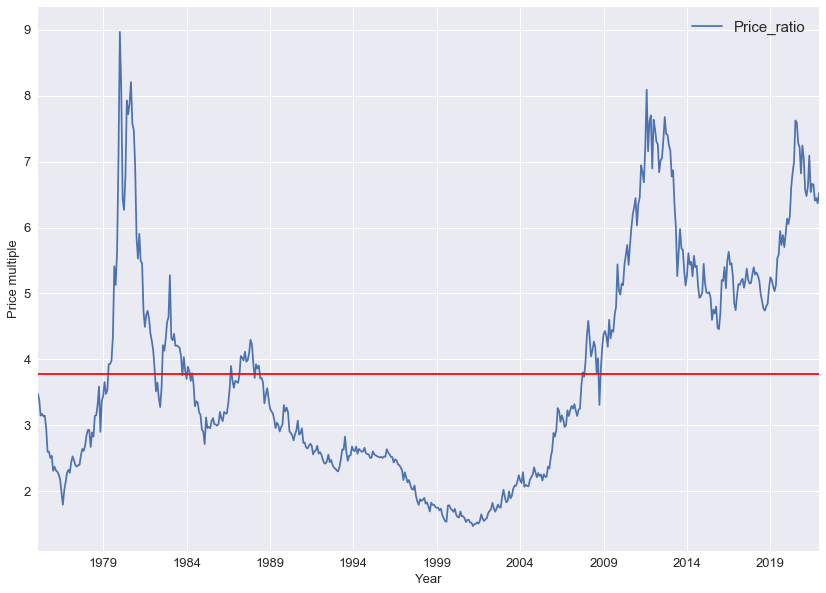

In [109]:
gold_vs_cpi.Price_ratio.plot(figsize=(14,10), fontsize=13, grid=True)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price multiple", fontsize=13)
plt.legend(loc=0, fontsize=15)
plt.axhline(gold_vs_cpi.Price_ratio.mean(), color="red")
plt.savefig("price multiple plot.png")
plt.show()

In [107]:
gold_vs_cpi.Price_ratio.mean()

3.7749228347490273